In [23]:
import pandas as pd
import numpy as np
import os
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from matplotlib import pyplot as plt
os.chdir('F:\mugdhapolimera\Documents\UNC\Research\Data\GALEX')

In [3]:
#GALEX-SDSS-WISE Legacy Catalog; Medium depth; 49% of SDSS 
#pages.iu.edu/~salims/gswlc
galex_file = np.loadtxt('GSWLC-M1.dat')
headers = ['objid', 'glxid', 'plate', 'mjd', 'fiberid', 'ra', 'dec', 'z', 'chisq', 'logmstar', 'logmstar_err', 'logsfr_sed',
          'logsfr_sed_err', 'a_fuv', 'a_fuv_err', 'a_b', 'a_b_err', 'a_v', 'a_v_err', 'flag_sed', 'uv_survey', 'logsfr_wise',  
           'flag_wise', 'logsfr_unwise_err', 'flag_unwise', 'flag_mgs']
galex = pd.DataFrame(galex_file, columns = headers)
#3XMM-Newton DR6
xmm = pd.read_csv('3XMM_DR6cat_slim_v1.0.csv')

In [18]:
print len(galex), len(xmm)
print xmm.sc_ra
#print [x for x in galex.index.values if galex.ra.loc[x] in list(xmm.sc_ra)]

361328 468440
0           0.000395
1           0.001138
2           0.001307
3           0.001344
4           0.003264
5           0.004930
6           0.005699
7           0.006724
8           0.006999
9           0.007642
10          0.008809
11          0.008875
12          0.009181
13          0.009460
14          0.009972
15          0.010054
16          0.010373
17          0.011219
18          0.011938
19          0.012095
20          0.012591
21          0.012660
22          0.013401
23          0.013433
24          0.013503
25          0.014083
26          0.014299
27          0.015342
28          0.015539
29          0.015587
             ...    
468410    359.982749
468411    359.982962
468412    359.983572
468413    359.983614
468414    359.983937
468415    359.984105
468416    359.984146
468417    359.984236
468418    359.984381
468419    359.984982
468420    359.985038
468421    359.986020
468422    359.986933
468423    359.988404
468424    359.989857
468425    359.990836

In [21]:
#For all sources in XMM, find GSWLC counterparts
coo_xmm = SkyCoord(np.array(xmm.sc_ra)*u.deg, np.array(xmm.sc_dec)*u.deg)
coo_galex = SkyCoord(np.array(galex['ra'])*u.deg, np.array(galex['dec'])*u.deg)

idx_xmm, d2d_xmm, d3d_xmm = coo_galex.match_to_catalog_sky(coo_xmm)

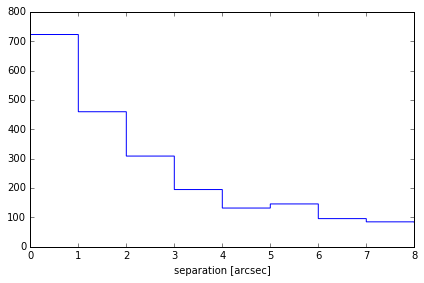

In [50]:
%matplotlib inline 
plt.hist(d2d_xmm.arcsec, histtype='step',bins = np.arange(0,20000),  range = (0,80))
plt.xlim(0,8)
plt.xlabel('separation [arcsec]')
plt.tight_layout()

In [ ]:
idx_xmm, idx_galex, d2d_xmm, d3d_xmm = coo_galex.search_around_sky(coo_xmm, 7*u.deg)

In [42]:
print idx_xmm

361328